Load data and dependencies.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

You are walking in the forest and see an iris and measure:

4.8,2.5,5.3,2.4
Is this an Iris Virginica or not?

The absolute minimum is to derive 4 probabilities for each feature. But it would be best to evaluate all 4 values in a (combined) equation to get one single probability for Iris Virginica!

In [2]:
data = pd.DataFrame(iris.data)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
target = pd.DataFrame(iris.target)
target = target.rename(columns = {0: 'target'})
target.head(200)

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [4]:
df = pd.concat([data, target], axis = 1)
df.head(200)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:>

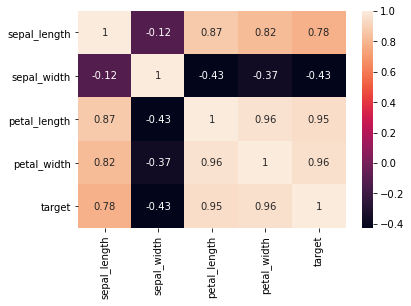

In [8]:
sns.heatmap(df.corr(), annot = True)

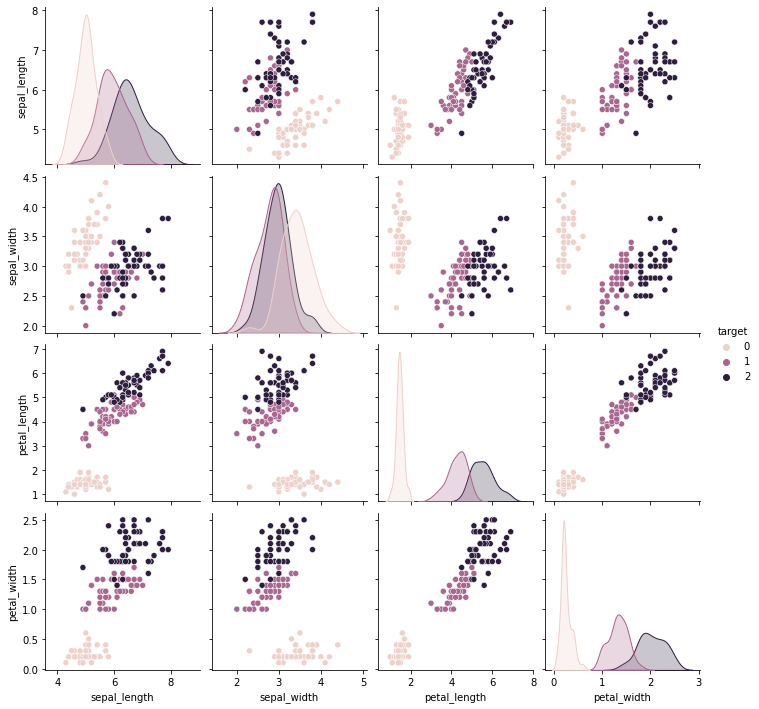

In [9]:
sns.pairplot(df, hue='target')

In [10]:
data = df.values
# Datas.
X = data[:,0:4]
# Targets.
Y = data[:,4]

# Training and test data select.
# X_train: Training data (features).
# X_test: Test data (features).
# y_train: Training target data.
# y_test: Test target data.
# 20% of the data is training data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Create model with training and test datas.
svn = SVC()
svn.fit(X_train, y_train)

# Data to be checked.
X_new = np.array([[4.8,2.5,5.3,2.4]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [2.]


In [11]:
text = "It is most likely a "
if (format(prediction) == '[0.]'):
    text += "Iris-Setosa."
elif (format(prediction) == '[1.]'):
    text += "Iris-Versicolour."
elif (format(prediction) == '[2.]'):
    text += "Iris-Virginica."
print(text)

It is most likely a Iris-Virginica.


The next lines are only intended for visual control. The test record was entered with its own target to check where this point lies.

In [12]:
# Test data set with custom target.
test_row = {'sepal_length':4.8,
'sepal_width':2.5,
'petal_length':5.3,
'petal_width':2.4,
'target':3}
test = df.append(test_row,ignore_index=True)
test['target']=test['target'].astype(int)
# Check row datatypes.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   151 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    float64
 4   target        151 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


/usr/lib/python3/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


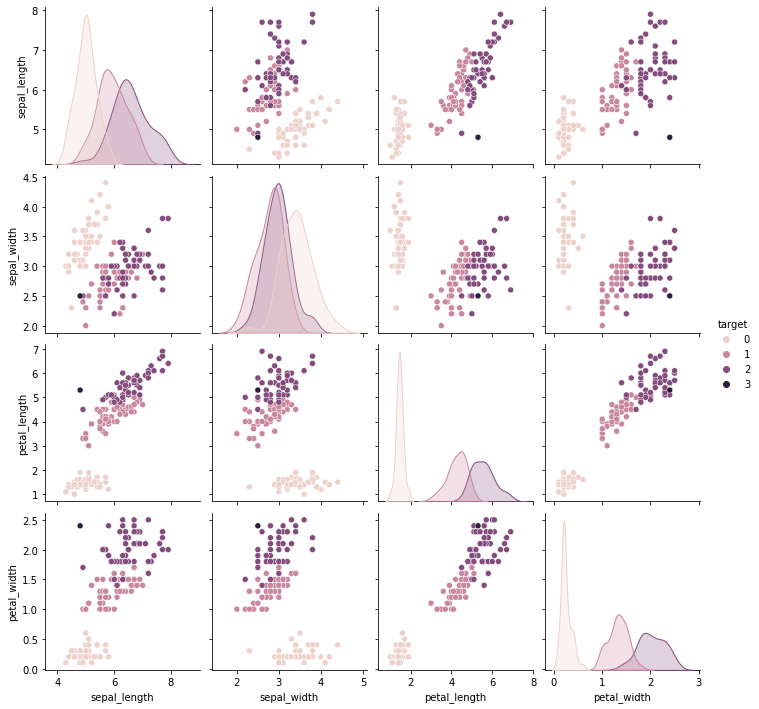

In [13]:
sns.pairplot(test, hue='target')

As can be seen from the graphics, the test point in many of the small graphics
is in the amount of "Iris-Virginica" or very close to it.